# ABEL experiment tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys
sys.path.append('../')
from abel import *

initializing ocelot...


### Define the input beams

In [2]:
# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 10e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 100e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 50e-3, 50e-3 # [m]
driver.num_particles = 100000
driver.symmetrize = True

# define witness bunch
witness = SourceBasic()
witness.charge = -0.5e-9 # [C]
witness.energy = driver.energy # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 5e-6 # [m]
witness.z_offset = -28e-6 # [m]
witness.emit_nx, witness.emit_ny = 1e-6, 1e-6 # [m rad]
witness.beta_x, witness.beta_y = 40e-3, 10e-3 # [m]
witness.num_particles = 50000
witness.x_offset, witness.y_offset = 10e-6, 0e-6 # [m]


### Define the experimental setup

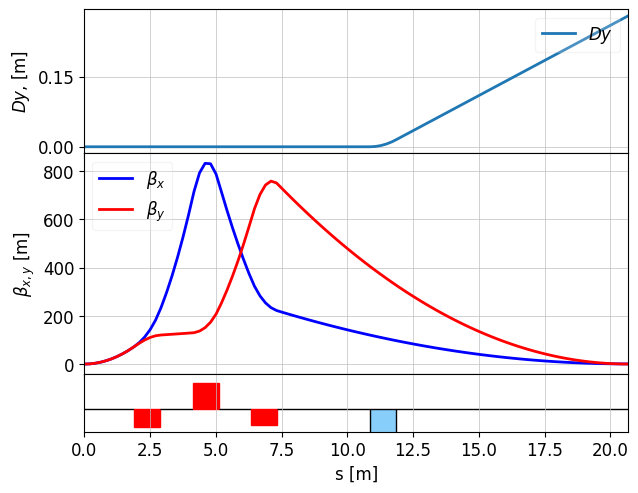

In [3]:
# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = witness.beta_x # [m]
bds.beta_y = witness.beta_y # [m]

# define stage
stage = StageQuasistatic2d()
stage.driver_source = driver
stage.length = 0.8 # [m]
stage.plasma_density = 4e22 # [m^-3]

# define spectrometer
spectrometer = SpectrometerFacetOcelot()
spectrometer.obj_plane = 0 # [m]
spectrometer.obj_plane_y = 0 # [m]
spectrometer.mag_x = -4
spectrometer.img_energy = 18e9 # [eV]
spectrometer.bend_angle = -0.03
spectrometer.plot_twiss()

# define experiment
experiment = Experiment()
experiment.source = witness
experiment.bds = bds
experiment.stage = stage
experiment.spectrometer = spectrometer

### Perform linac tracking

In [4]:
# perform experiment tracking
beam = experiment.run('experiment_example', num_shots=1, parallel=False, overwrite=True)

Tracking element 1 (s = 0.0 m, -0.50 nC, 10.0 GeV, SourceBasic, stage 0)
Tracking element 2 (s = 0.0 m, -0.50 nC, 10.0 GeV, BeamDeliverySystemBasic, stage 0)


/pfs/lustrep4/users/lindstrm/.pyvenv/lib/python3.9/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))


Tracking element 3 (s = 0.8 m, -0.50 nC, 19.9 GeV, StageQuasistatic2d, stage 1)
Tracking element 4 (s = 21.5 m, -0.50 nC, 19.9 GeV, SpectrometerFacetOcelot, stage 1)


### Plot the wakefield

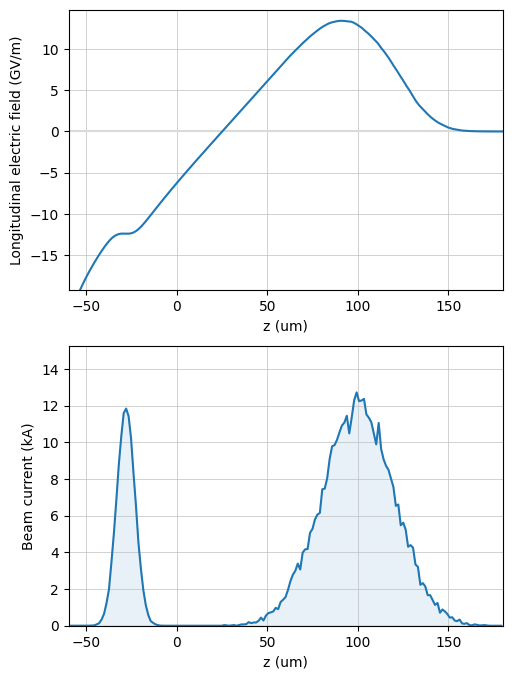

In [5]:
# plot wakefield
experiment.stage.plot_wakefield()

### Plot the spectrometer screen

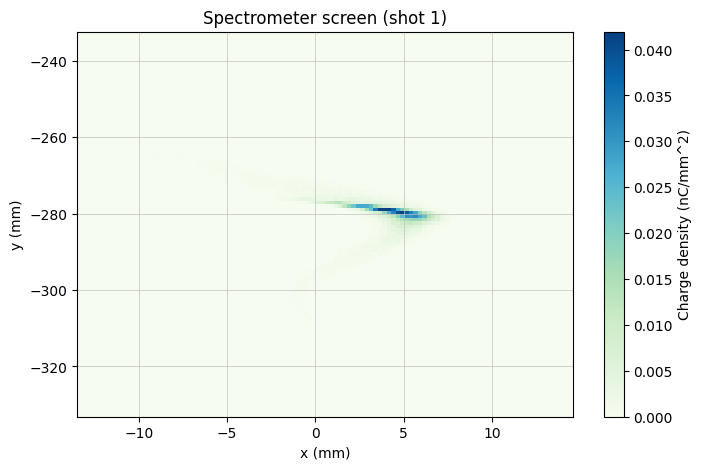

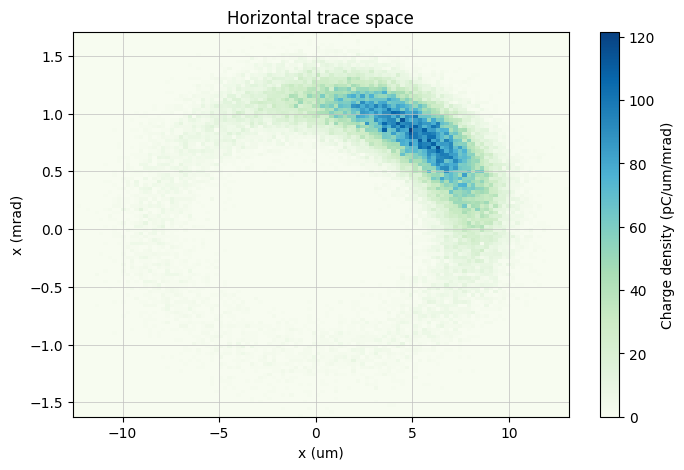

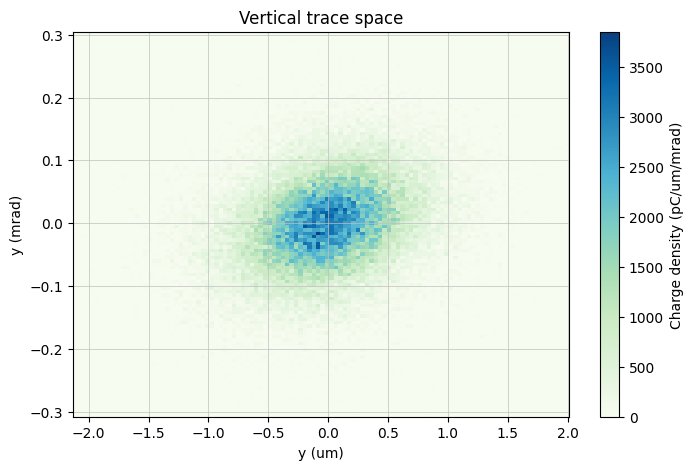

In [6]:
experiment.plot_spectrometer_screen()
experiment.get_beam(-2).plot_trace_space_x()
experiment.get_beam(-2).plot_trace_space_y()

### Plot longitudinal phase space

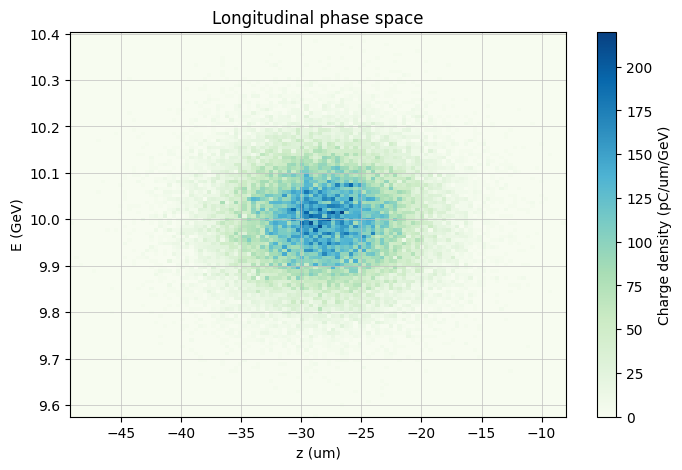

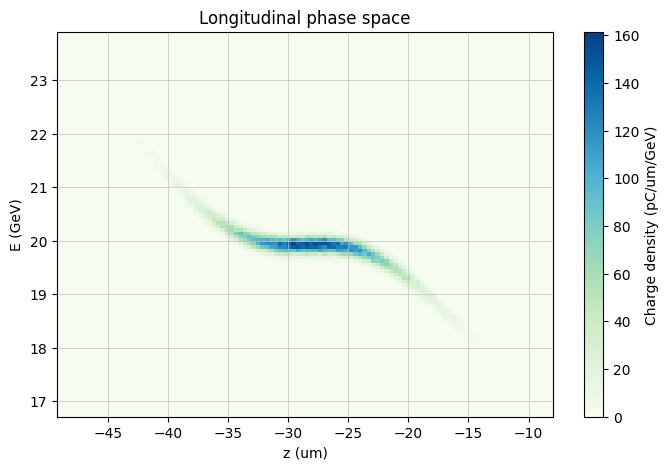

In [7]:
# plot the longitudinal phase space (before and after the PWFA)
experiment.get_beam(index=-3).plot_lps()
experiment.get_beam(index=-2).plot_lps()